In [245]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [246]:
df = pd.read_csv('../data/Global_Crop_Yield_Prediction_Dataset.csv')
print(df.head())
print(df.info())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                           1485              121.0     16.37  
1                           1485              121.0     16.37  
2                           1485              121.0     16.37  
3                           1485              121.0     16.37  
4                           1485              121.0     16.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28240 entries, 0 to 28239
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     282

In [247]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64


In [248]:
# Defining the independent features and the target variable
X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]  # Features related to weather and pesticide usage
y = df['hg/ha_yield']  

In [249]:
#average yield per crop type
avg_yield_by_item = df.groupby("Item")["hg/ha_yield"].mean()
print(avg_yield_by_item)

Item
Cassava                 150479.466993
Maize                    36310.070614
Plantains and others    106041.320144
Potatoes                199801.549579
Rice, paddy              40730.434770
Sorghum                  18635.777229
Soybeans                 16732.206704
Sweet potatoes          119091.312565
Wheat                    30116.267825
Yams                    114140.345927
Name: hg/ha_yield, dtype: float64


In [250]:
#total yield for each geographic area
total_yield_by_area = df.groupby("Area")["hg/ha_yield"].sum()
print(total_yield_by_area)

Area
Albania            5711536
Algeria            6711464
Angola             5722563
Argentina         32864032
Armenia            4524100
                    ...   
Ukraine            5496901
United Kingdom    55419990
Uruguay            9539820
Zambia             7254311
Zimbabwe           7373265
Name: hg/ha_yield, Length: 101, dtype: int64


In [251]:
#the top 5 crop types by average yield
top_yields_by_item = df.groupby("Item")["hg/ha_yield"].mean().nlargest(5)
print(top_yields_by_item)

Item
Potatoes                199801.549579
Cassava                 150479.466993
Sweet potatoes          119091.312565
Yams                    114140.345927
Plantains and others    106041.320144
Name: hg/ha_yield, dtype: float64


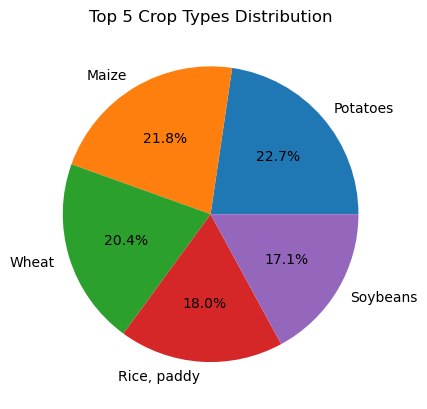

In [252]:
df["Item"].value_counts().nlargest(5).plot(kind="pie", autopct='%1.1f%%')
plt.title("Top 5 Crop Types Distribution")
plt.ylabel("")
plt.show()

In [253]:
#average annual rainfall for each area
avg_rain_by_area = df.groupby("Area")["average_rain_fall_mm_per_year"].mean()
print(avg_rain_by_area)


Area
Albania           1485.0
Algeria             89.0
Angola            1010.0
Argentina          591.0
Armenia            562.0
                   ...  
Ukraine            565.0
United Kingdom    1220.0
Uruguay           1300.0
Zambia            1020.0
Zimbabwe           657.0
Name: average_rain_fall_mm_per_year, Length: 101, dtype: float64


In [254]:
#total pesticide usage per year
total_pesticides_by_year = df.groupby("Year")["pesticides_tonnes"].sum()
print(total_pesticides_by_year)

Year
1990    32854849.99
1991    32797319.01
1992    33837494.13
1993    33986466.87
1994    33792967.00
1995    35266238.84
1996    36209022.78
1997    37691844.10
1998    39148511.68
1999    39475841.56
2000    41074386.48
2001    40374444.13
2002    38023171.88
2004    45958242.57
2005    49212567.54
2006    49151061.40
2007    55893759.95
2008    54234529.58
2009    57806384.04
2010    62223272.13
2011    65659418.53
2012    65991811.55
2013    66457367.80
Name: pesticides_tonnes, dtype: float64


In [255]:
#average temperature associated with each crop type
avg_temp_by_item = df.groupby("Item")["avg_temp"].mean()
print(avg_temp_by_item)

Item
Cassava                 24.205756
Maize                   19.925159
Plantains and others    24.243543
Potatoes                19.007725
Rice, paddy             21.265378
Sorghum                 21.431586
Soybeans                19.660248
Sweet potatoes          22.179505
Wheat                   18.131623
Yams                    22.695726
Name: avg_temp, dtype: float64


In [256]:
#how many distinct years are reported for each area
years_by_area = df.groupby("Area")["Year"].nunique()
print(years_by_area)

Area
Albania           23
Algeria           23
Angola            23
Argentina         23
Armenia           21
                  ..
Ukraine           21
United Kingdom    23
Uruguay           23
Zambia            23
Zimbabwe          23
Name: Year, Length: 101, dtype: int64


In [257]:
#the maximum yield observed in each area
max_yield_by_area = df.groupby("Area")["hg/ha_yield"].max()
print(max_yield_by_area)

Area
Albania           260110
Algeria           304291
Angola            155782
Argentina         293744
Armenia           215290
                   ...  
Ukraine           168039
United Kingdom    444167
Uruguay           224434
Zambia            172628
Zimbabwe          171875
Name: hg/ha_yield, Length: 101, dtype: int64


In [258]:
#average yield as a function of rainfall amount
avg_yield_by_rain = df.groupby("average_rain_fall_mm_per_year")["hg/ha_yield"].mean()
print(avg_yield_by_rain)

average_rain_fall_mm_per_year
51      114375.304348
56       65335.420290
59       82455.902174
74       86893.130435
83      153237.551724
            ...      
2666     52518.088435
2702     83567.036232
2875     85322.387097
3142     66645.521739
3240     65041.396135
Name: hg/ha_yield, Length: 100, dtype: float64


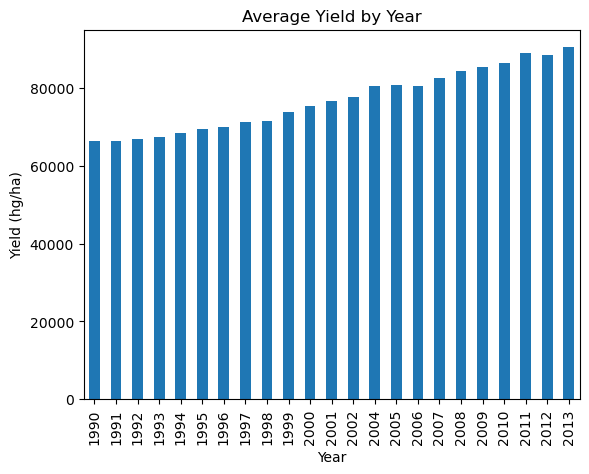

In [259]:
df.groupby("Year")["hg/ha_yield"].mean().plot(kind="bar")
plt.title("Average Yield by Year")
plt.xlabel("Year")
plt.ylabel("Yield (hg/ha)")
plt.show()

In [260]:
#total yield for Maize specifically
maize_yield = df[df["Item"] == "Maize"]["hg/ha_yield"].sum()
print(f"Total Maize Yield: {maize_yield}")

Total Maize Yield: 149633801


In [261]:
#average pesticide usage for each area
avg_pesticides_by_area = df.groupby("Area")["pesticides_tonnes"].mean()
print(avg_pesticides_by_area)

Area
Albania             601.238788
Algeria            4226.762982
Angola               56.701220
Argentina         67929.460000
Armenia             138.646190
                      ...     
Ukraine           46535.490476
United Kingdom    28159.440870
Uruguay            7976.014348
Zambia             1500.260870
Zimbabwe           3202.400989
Name: pesticides_tonnes, Length: 101, dtype: float64


In [262]:
#how many unique crop types are recorded per area
item_count_by_area = df.groupby("Area")["Item"].nunique()
print(item_count_by_area)

Area
Albania           6
Algeria           5
Angola            8
Argentina         8
Armenia           3
                 ..
Ukraine           6
United Kingdom    2
Uruguay           7
Zambia            8
Zimbabwe          8
Name: Item, Length: 101, dtype: int64


In [263]:
#average temperature per year
avg_temp_by_year = df.groupby("Year")["avg_temp"].mean()
print(avg_temp_by_year)

Year
1990    20.894777
1991    20.693746
1992    20.128310
1993    20.173639
1994    20.401826
1995    20.408322
1996    20.119656
1997    20.336225
1998    20.740196
1999    20.513712
2000    20.439301
2001    20.569699
2002    20.763306
2004    20.567861
2005    20.583247
2006    20.596299
2007    20.609815
2008    20.428481
2009    20.727536
2010    20.721526
2011    20.441855
2012    20.649254
2013    20.974797
Name: avg_temp, dtype: float64


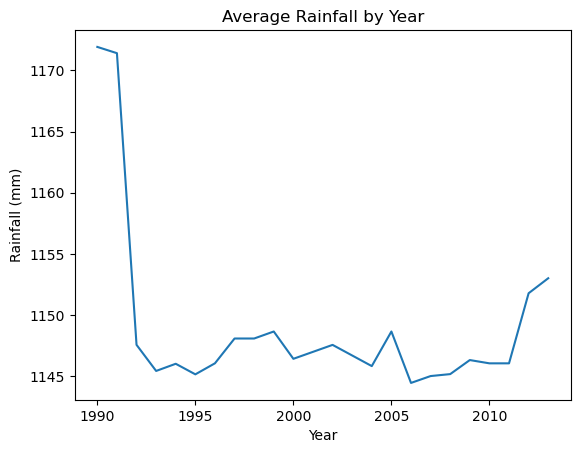

In [264]:
df.groupby("Year")["average_rain_fall_mm_per_year"].mean().plot(kind="line")
plt.title("Average Rainfall by Year")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.show()

In [265]:
#the top 20 areas by average yield
top_areas_by_yield = df.groupby("Area")["hg/ha_yield"].mean().nlargest(20)
print(top_areas_by_yield)

Area
United Kingdom    240956.478261
Belgium           216468.461538
Denmark           214033.020000
Netherlands       204151.202899
Ireland           197913.695652
New Zealand       191931.826087
Sweden            187405.500000
Bahrain           153237.551724
Norway            146115.326087
Switzerland       144960.282609
Germany           143631.344444
Finland           135014.521739
Japan             128851.875776
Mauritius         125586.257426
Jamaica           122347.869565
France            114424.768116
Egypt             114375.304348
Austria           113044.354167
Australia         112951.409938
Suriname          107148.318841
Name: hg/ha_yield, dtype: float64


In [266]:
#average yield in high-rain areas (rainfall > 1000 mm)
avg_yield_high_rain = df[df["average_rain_fall_mm_per_year"] > 1000]["hg/ha_yield"].mean()
print(f"Avg Yield with Rainfall > 1000mm: {avg_yield_high_rain:.2f}")

Avg Yield with Rainfall > 1000mm: 76903.79


In [267]:
#total pesticide usage per crop type
total_pesticides_by_item = df.groupby("Item")["pesticides_tonnes"].sum()
print(total_pesticides_by_item)


Item
Cassava                 9.035077e+07
Maize                   1.350286e+08
Plantains and others    4.409641e+06
Potatoes                1.374842e+08
Rice, paddy             1.251602e+08
Sorghum                 1.116603e+08
Soybeans                1.313429e+08
Sweet potatoes          1.140030e+08
Wheat                   1.367430e+08
Yams                    6.093824e+07
Name: pesticides_tonnes, dtype: float64


In [268]:
#the minimum yield recorded each year
min_yield_by_year = df.groupby("Year")["hg/ha_yield"].min()
print(min_yield_by_year)

Year
1990    1257
1991    1449
1992      50
1993      80
1994     111
1995     117
1996     227
1997     200
1998     383
1999     260
2000     525
2001     540
2002     230
2004     100
2005    2034
2006     500
2007     824
2008     112
2009    2358
2010    1320
2011    1124
2012     998
2013     849
Name: hg/ha_yield, dtype: int64


In [269]:
#average rainfall per crop type
avg_rain_by_item = df.groupby("Item")["average_rain_fall_mm_per_year"].mean()
print(avg_rain_by_item)

Item
Cassava                 1481.128606
Maize                   1098.124242
Plantains and others    1853.928058
Potatoes                1060.399205
Rice, paddy             1186.672963
Sorghum                 1017.179664
Soybeans                1110.915580
Sweet potatoes          1232.327103
Wheat                    957.285974
Yams                    1638.162928
Name: average_rain_fall_mm_per_year, dtype: float64


In [270]:
#areas with average temperature above 20°C
total_yield_high_temp = df[df["avg_temp"] > 20]["hg/ha_yield"].sum()
print(f"Total Yield with Temp > 20°C: {total_yield_high_temp}")


Total Yield with Temp > 20°C: 1138828454


In [271]:
#average temperature in areas where yield is above overall mean
high_yield_temp = df[df["hg/ha_yield"] > df["hg/ha_yield"].mean()]["avg_temp"].mean()
print(f"Avg Temp in High Yield Areas: {high_yield_temp:.2f}")

Avg Temp in High Yield Areas: 20.40


In [272]:
#the maximum rainfall observed in each area
max_rain_by_area = df.groupby("Area")["average_rain_fall_mm_per_year"].max()
print(max_rain_by_area)

Area
Albania           1485
Algeria             89
Angola            1010
Argentina          591
Armenia            562
                  ... 
Ukraine            565
United Kingdom    1220
Uruguay           1300
Zambia            1020
Zimbabwe           657
Name: average_rain_fall_mm_per_year, Length: 101, dtype: int64


In [273]:
#average yield for the period 2000–2010
avg_yield_2000_2010 = df[(df["Year"] >= 2000) & (df["Year"] <= 2010)]["hg/ha_yield"].mean()
print(f"Avg Yield 2000-2010: {avg_yield_2000_2010:.2f}")

Avg Yield 2000-2010: 81027.23


In [274]:
#Maize in Albania specifically
albania_maize_yield = df[(df["Area"] == "Albania") & (df["Item"] == "Maize")]["hg/ha_yield"].sum()
print(f"Total Maize Yield in Albania: {albania_maize_yield}")

Total Maize Yield in Albania: 981290


In [275]:
#average pesticide usage in areas with below-average yield
low_yield_pesticides = df[df["hg/ha_yield"] < df["hg/ha_yield"].mean()]["pesticides_tonnes"].mean()
print(f"Avg Pesticides in Low Yield Areas: {low_yield_pesticides:.2f}")

Avg Pesticides in Low Yield Areas: 33610.01


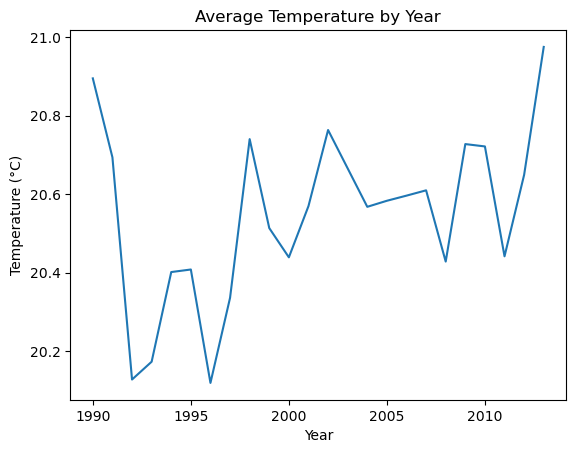

In [276]:
df.groupby("Year")["avg_temp"].mean().plot(kind="line")
plt.title("Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

In [277]:
#the top 5 years by average yield
top_years_by_yield = df.groupby("Year")["hg/ha_yield"].mean().nlargest(5)
print(top_years_by_yield)

Year
2013    90472.996818
2011    88908.335743
2012    88569.850794
2010    86512.526104
2009    85350.016908
Name: hg/ha_yield, dtype: float64


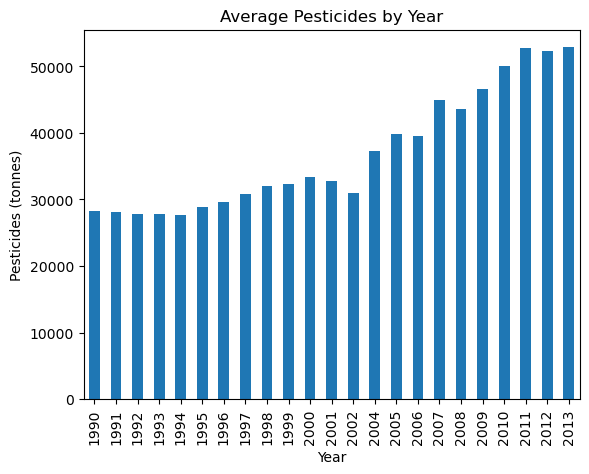

In [278]:
df.groupby("Year")["pesticides_tonnes"].mean().plot(kind="bar")
plt.title("Average Pesticides by Year")
plt.xlabel("Year")
plt.ylabel("Pesticides (tonnes)")
plt.show()

In [279]:
print(df.head())
print(df.isnull().sum())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                           1485              121.0     16.37  
1                           1485              121.0     16.37  
2                           1485              121.0     16.37  
3                           1485              121.0     16.37  
4                           1485              121.0     16.37  
Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp              

In [280]:
#the independent features and the target variable
X = df[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]
y = df['hg/ha_yield']  #Crop yield per hectare

In [281]:
#Splitting the data into training and testing sets
# 80% train, 20% test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [282]:
#Training a linear regression model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [283]:
# Evaluating the model's performance on the test data
# Coefficient of determination (R^2)
score = model.score(X_test, y_test)  
#Displays model accuracy
print(f"Model Accuracy (R^2): {score:.2f}")  

Model Accuracy (R^2): 0.02


In [284]:
#average values of relevant features by area and item, assuming these are used for 2025 prediction
avg_2025 = df.groupby(['Area', 'Item'])[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']].mean().reset_index()
avg_2025['Year'] = 2025  
X_2025 = avg_2025[['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']]


In [285]:
#predictions for crop yield in 2025 based on the model
y_pred_2025 = model.predict(X_2025)  
avg_2025['predicted_yield_2025'] = y_pred_2025  #Adding predictions to the dataframe
print(avg_2025[['Area', 'Item', 'predicted_yield_2025']])


         Area            Item  predicted_yield_2025
0     Albania           Maize          82693.404458
1     Albania        Potatoes          82693.404458
2     Albania     Rice, paddy          83268.647505
3     Albania         Sorghum          83319.305350
4     Albania        Soybeans          82693.404458
..        ...             ...                   ...
593  Zimbabwe     Rice, paddy          71824.761788
594  Zimbabwe         Sorghum          71824.761788
595  Zimbabwe        Soybeans          71745.020931
596  Zimbabwe  Sweet potatoes          71745.020931
597  Zimbabwe           Wheat          71824.761788

[598 rows x 3 columns]


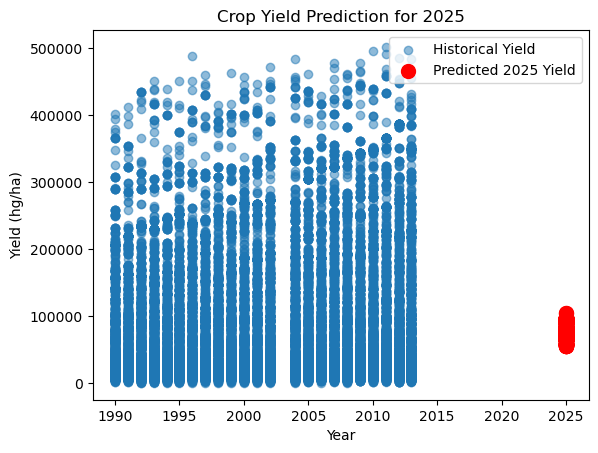

In [286]:
plt.scatter(df['Year'], df['hg/ha_yield'], label='Historical Yield', alpha=0.5)
plt.scatter([2025] * len(avg_2025), avg_2025['predicted_yield_2025'], color='red', label='Predicted 2025 Yield', s=100)
plt.xlabel('Year')
plt.ylabel('Yield (hg/ha)')
plt.title('Crop Yield Prediction for 2025')
plt.legend()
plt.show()


In [287]:
#the top 20 areas with the highest predicted yield in 2025
top_areas_2025 = avg_2025.sort_values(by='predicted_yield_2025', ascending=False).head(20)
print("Top 20 Areas for 2025 Yield:\n", top_areas_2025[['Area', 'Item', 'predicted_yield_2025']])

Top 20 Areas for 2025 Yield:
             Area            Item  predicted_yield_2025
429       Norway           Wheat         104132.311982
428       Norway        Potatoes         104132.311982
112       Canada           Maize          97780.880049
113       Canada        Potatoes          97780.880049
114       Canada        Soybeans          97780.880049
115       Canada           Wheat          97780.880049
534  Switzerland        Soybeans          97233.485141
535  Switzerland           Wheat          97233.485141
532  Switzerland           Maize          97233.485141
533  Switzerland        Potatoes          97233.485141
183      Finland        Potatoes          96973.918220
184      Finland           Wheat          96973.918220
302   Kazakhstan        Soybeans          96886.301407
303   Kazakhstan           Wheat          96886.301407
299   Kazakhstan        Potatoes          96886.301407
300   Kazakhstan     Rice, paddy          96886.301407
298   Kazakhstan           Maize   

In [288]:
#average predicted yield by crop type for 2025
avg_yield_by_item_2025 = avg_2025.groupby('Item')['predicted_yield_2025'].mean()
print("Average Predicted Yield by Item for 2025:\n", avg_yield_by_item_2025)

Average Predicted Yield by Item for 2025:
 Item
Cassava                 70656.336606
Maize                   77519.448086
Plantains and others    70406.821983
Potatoes                79209.293186
Rice, paddy             75379.380118
Sorghum                 75158.647908
Soybeans                79625.216453
Sweet potatoes          72786.994030
Wheat                   81348.185193
Yams                    70320.481546
Name: predicted_yield_2025, dtype: float64


In [289]:
#how rainfall affects the predicted yield
rain_impact = avg_2025.groupby('average_rain_fall_mm_per_year')['predicted_yield_2025'].mean()
print("Impact of Rainfall on Predicted Yield:\n", rain_impact)

Impact of Rainfall on Predicted Yield:
 average_rain_fall_mm_per_year
51.0      68293.784595
56.0      70527.411521
59.0      59958.767016
74.0      57145.907689
83.0      59660.897458
              ...     
2666.0    71685.052068
2702.0    69993.477489
2875.0    73658.989973
3142.0    74466.127875
3240.0    80040.319262
Name: predicted_yield_2025, Length: 100, dtype: float64


In [290]:
#predicted yield for 2025 with historical average yields
historical_avg = df.groupby(['Area', 'Item'])['hg/ha_yield'].mean().reset_index()
merged_data = pd.merge(avg_2025, historical_avg, on=['Area', 'Item'], how='left') #Merging predictions with historical data
merged_data['yield_change_percent'] = ((merged_data['predicted_yield_2025'] - merged_data['hg/ha_yield']) / merged_data['hg/ha_yield']) * 100  # Calculating % change
print("Yield Change Percentage for 2025:\n", merged_data[['Area', 'Item', 'yield_change_percent']])

Yield Change Percentage for 2025:
          Area            Item  yield_change_percent
0     Albania           Maize             93.821225
1     Albania        Potatoes            -45.989105
2     Albania     Rice, paddy            149.201007
3     Albania         Sorghum            990.852387
4     Albania        Soybeans            483.373198
..        ...             ...                   ...
593  Zimbabwe     Rice, paddy            217.037130
594  Zimbabwe         Sorghum           1758.358856
595  Zimbabwe        Soybeans            311.072368
596  Zimbabwe  Sweet potatoes            236.361642
597  Zimbabwe           Wheat             64.196992

[598 rows x 3 columns]


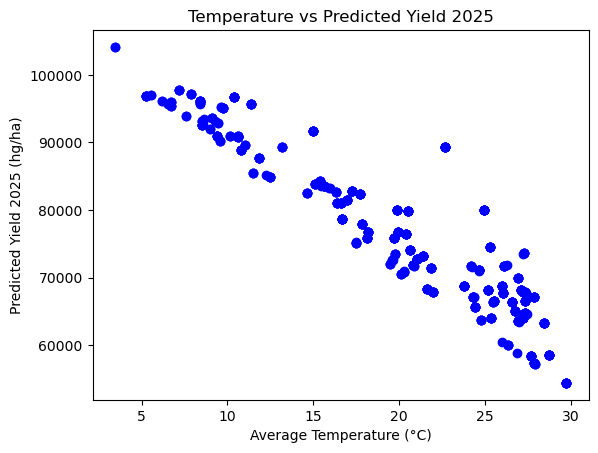

In [291]:
plt.scatter(avg_2025['avg_temp'], avg_2025['predicted_yield_2025'], c='blue')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Predicted Yield 2025 (hg/ha)')
plt.title('Temperature vs Predicted Yield 2025')
plt.show()

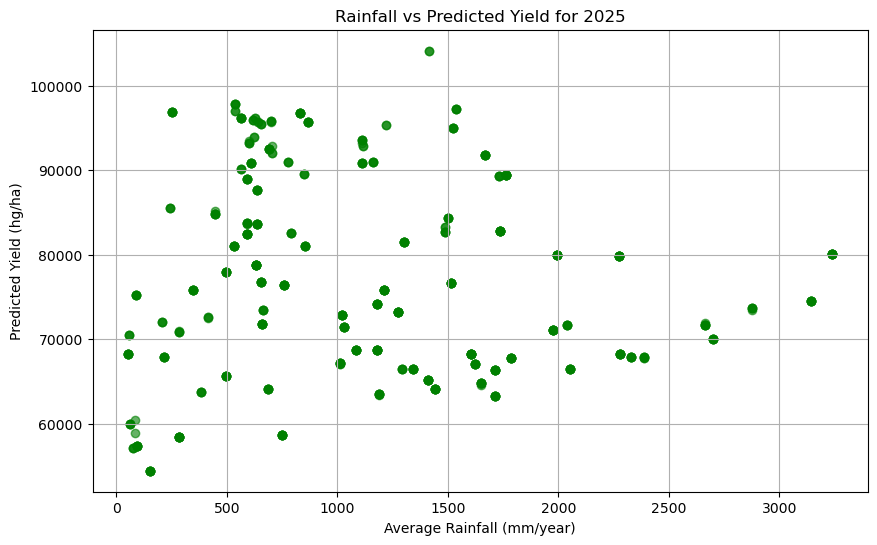

In [292]:
plt.figure(figsize=(10, 6))
plt.scatter(avg_2025['average_rain_fall_mm_per_year'], avg_2025['predicted_yield_2025'], c='green', alpha=0.6)
plt.title('Rainfall vs Predicted Yield for 2025')
plt.xlabel('Average Rainfall (mm/year)')
plt.ylabel('Predicted Yield (hg/ha)')
plt.grid(True)
plt.show()

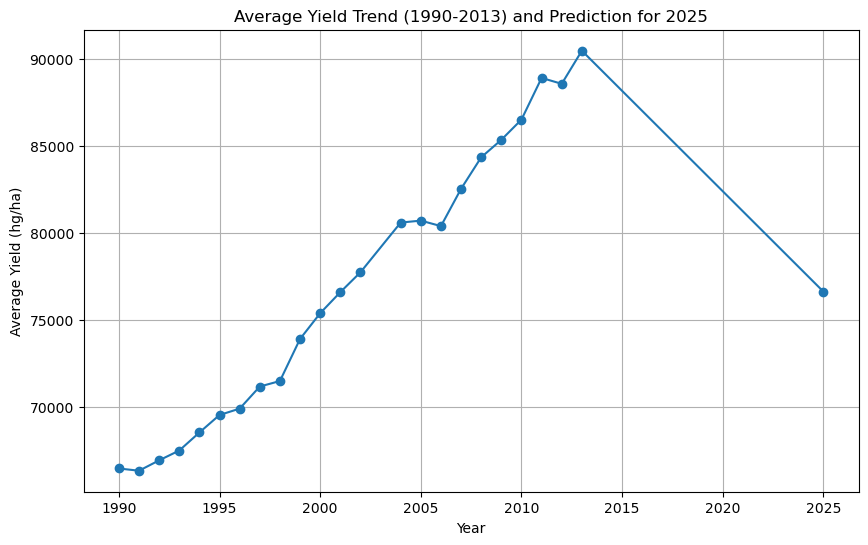

In [293]:
plt.figure(figsize=(10, 6))
historical_avg_yield = df.groupby('Year')['hg/ha_yield'].mean()
predicted_2025 = pd.Series([avg_2025['predicted_yield_2025'].mean()], index=[2025])
pd.concat([historical_avg_yield, predicted_2025]).plot(kind='line', marker='o')
plt.title('Average Yield Trend (1990-2013) and Prediction for 2025')
plt.xlabel('Year')
plt.ylabel('Average Yield (hg/ha)')
plt.grid()
plt.show()

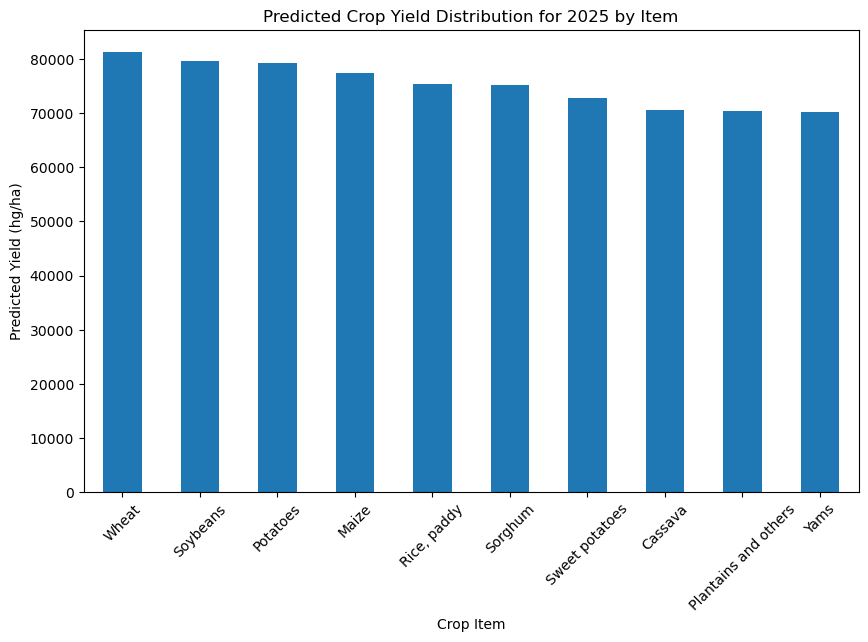

In [294]:
plt.figure(figsize=(10, 6))
avg_2025.groupby('Item')['predicted_yield_2025'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Predicted Crop Yield Distribution for 2025 by Item')
plt.xlabel('Crop Item')
plt.ylabel('Predicted Yield (hg/ha)')
plt.xticks(rotation=45)
plt.show()